In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('line_plot.csv', header = None, index_col=None)
df.head()

,0,1
0,34.669314,58.973074
1,34.982767,50.488572
2,36.317764,67.811189
3,36.571520,44.592360
4,38.042890,73.439273


## Pre-processing

In [3]:
df_x = df.iloc[:, 0].to_numpy()*5
df_y = df.iloc[:, 1].to_numpy()*5 + 75 # offest for indexing

## Helper functions

In [4]:
def line_to_matrix(x, y, size = 1050):
    matrix = np.zeros((size, size))
    num_data = len(x)
    for i in range(num_data):
        matrix[int(y[i]), int(x[i])] = 1 #int casting, just in case input not an int
    return matrix
        
def matrix_to_line(matrix):
    x = []
    y = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 1:
                x.append(j)
                y.append(i)
    return x, y


In [5]:
def rotate_matrix_90_degrees(matrix):
    # Transpose the matrix
    transposed_matrix = matrix.T
    
    # Reverse the order of elements in each row
    rotated_matrix = [row[::-1] for row in transposed_matrix]
    
    return np.array(rotated_matrix)

def rotate_matrix_180_degrees(matrix):
    # Reverse the rows and then reverse the columns
    rotated_matrix = [row[::-1] for row in matrix[::-1]]
    return np.array(rotated_matrix)

## Tasks

Text(0.5, 1.0, '180 Degrees')

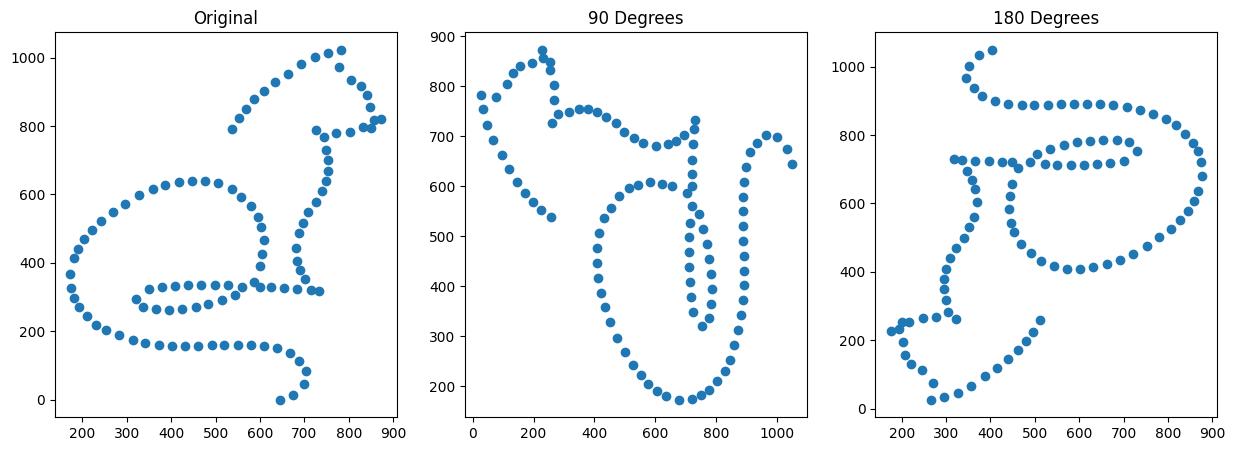

In [7]:
original_matrix = line_to_matrix(df_x, df_y)
rotated_matrix_90 = rotate_matrix_90_degrees(original_matrix)
rotated_matrix_180 = rotate_matrix_180_degrees(original_matrix)

x, y = matrix_to_line(original_matrix)
x_90, y_90 = matrix_to_line(rotated_matrix_90)
x_180, y_180 = matrix_to_line(rotated_matrix_180)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(x, y)
ax[0].set_title('Original')
ax[1].scatter(x_90, y_90)
ax[1].set_title('90 Degrees')
ax[2].scatter(x_180, y_180)
ax[2].set_title('180 Degrees')